In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from typing import List, Dict, Union, Tuple
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


2024-12-31 15:21:23.822597: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 15:21:23.973183: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 15:21:24.126245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735651284.265679     315 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735651284.307250     315 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-31 15:21:24.633992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
df = pd.read_csv('Spotify.csv')

columns_to_drop = ['Spotify Link', 'Song Image', 'Spotify URI']
data = df.drop(columns=columns_to_drop)

def convert_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str, errors='raise', dayfirst=True)
    except ValueError:
        if len(date_str) == 4: 
            return pd.to_datetime(f'01-01-{date_str}')
        else:
            return pd.NaT

# Apply the function to the date column
data['Album Release Date'] = data['Album Release Date'].apply(convert_to_datetime)


# Step 3: Remove duplicate rows
data = data.drop_duplicates()

data['Artist(s) Genres'] = data['Artist(s) Genres'].str.replace(r"[\[\]']", '', regex=True)
data['Artist Names'] = data['Artist Names'].str.replace(r"[\[\]']", '', regex=True)




/tmp/ipykernel_315/3559563061.py:8: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date_str, errors='raise', dayfirst=True)
/tmp/ipykernel_315/3559563061.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date_str, errors='raise', dayfirst=True)


In [5]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Album Release Date,6191,1995-10-05 09:00:33.144887808,1899-12-31 00:00:00,1981-02-13 12:00:00,1998-09-17 00:00:00,2011-01-24 12:00:00,2023-12-05 00:00:00,NaN
Hot100 Ranking Year,6191.0,1987.848167,1946.0,1971.0,1988.0,2005.0,2022.0,20.35487
Hot100 Rank,6191.0,48.320627,1.0,23.0,47.0,74.0,100.0,29.185349
Song Length(ms),6191.0,224626.535293,51800.0,181759.5,220734.0,257113.0,1561133.0,64360.369907
Popularity,6191.0,54.117913,0.0,42.0,58.0,70.0,94.0,21.51133
Acousticness,6191.0,0.300063,0.000004,0.04925,0.195,0.5115,0.995,0.291133
Danceability,6191.0,0.61771,0.0,0.5205,0.633,0.728,0.988,0.156799
Energy,6191.0,0.596881,0.012,0.4555,0.615,0.758,0.997,0.205486
Instrumentalness,6191.0,0.045992,0.0,0.0,0.000004,0.000523,0.972,0.170713
Liveness,6191.0,0.180755,0.015,0.0872,0.123,0.232,0.985,0.150009


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Song                 6191 non-null   object        
 1   Album                6191 non-null   object        
 2   Album Release Date   6191 non-null   datetime64[ns]
 3   Artist Names         6191 non-null   object        
 4   Artist(s) Genres     6191 non-null   object        
 5   Hot100 Ranking Year  6191 non-null   int64         
 6   Hot100 Rank          6191 non-null   int64         
 7   Song Length(ms)      6191 non-null   int64         
 8   Popularity           6191 non-null   int64         
 9   Acousticness         6191 non-null   float64       
 10  Danceability         6191 non-null   float64       
 11  Energy               6191 non-null   float64       
 12  Instrumentalness     6191 non-null   float64       
 13  Liveness             6191 non-nul

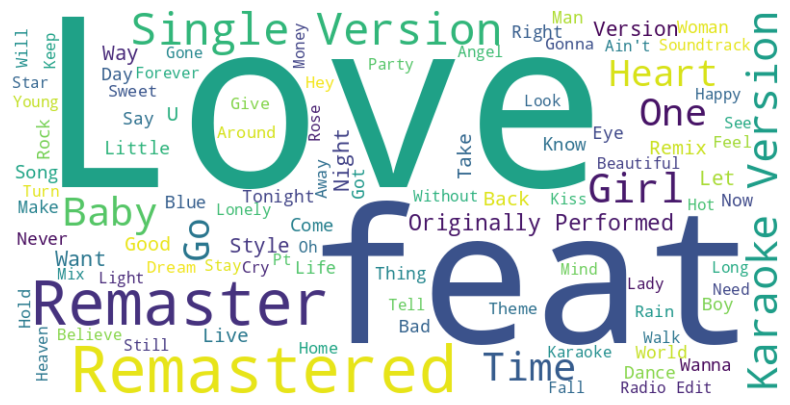

In [7]:
songs_text = ' '.join(data['Song'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(songs_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 🎶 Word Cloud of Song Titles 🎶

This **Word Cloud** represents the most frequent words in the song titles from our dataset. Here’s a quick breakdown of what we can observe:

- **Love ❤️** and **feat** are the most dominant words, indicating their frequent use in song titles.
- Other popular words include:
  - **Remaster 🔁**
  - **Remix 🔄**
  - **Baby 👶**
  - **Girl 👧**
  - **Night 🌙**
  - **Heart 💖**
  
This visualization offers a fun and creative way to see common themes and phrases in song titles! It's evident that collaboration (feat) and themes of love dominate the music industry, alongside various versions like remixes and remastered tracks. 🎧🎶


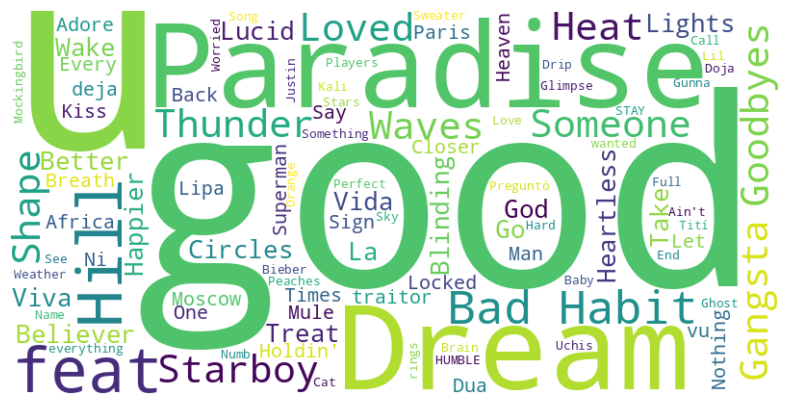

In [8]:
pop_ones = data[data['Popularity']  > 85]
songs_text = ' '.join(pop_ones['Song'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(songs_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 🎶 Word Cloud of Song Titles for Top 15% Popular Songs 🎤🎧

In this visualization, we showcase a **Word Cloud** representation of the most common words appearing in song titles among the **top 15% most popular songs** 🎵 based on our dataset.

The word size indicates how frequently each word appears in the song titles. Popular terms like **"good," "feat," "Paradise," and "Dream"** stand out prominently, reflecting their common use in hit songs 🌟.

### Key Insights:
- **"Good"** and **"feat"** are the most frequently occurring words, indicating a trend of collaborations and positivity in song titles.
- Words like **"Paradise," "Dream," "Thunder,"** and **"Believer"** suggest themes of optimism, strength, and imagination 🌈✨.
- The word **"U"** in large font is likely shorthand for "You," reflecting the personal and direct nature of many popular song lyrics ❤️.
- Other notable words like **"Heat," "Starboy,"** and **"Bad"** emphasize themes of energy, confidence, and self-expression 🔥⭐.


## Now that we made any use of string columns we get rid of them ##

In [9]:
data_rs = data.copy()

In [10]:
columns_to_drop = ['Song', 'Album', 'Album Release Date', 'Artist Names', 'Artist(s) Genres','Hot100 Ranking Year']
data = data.drop(columns=columns_to_drop)
print(data.columns)

Index(['Hot100 Rank', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')


## Now Normalization ##

In [11]:
df = pd.DataFrame(data)

popularity = df['Popularity']

columns_to_scale = df.columns.drop('Popularity')

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[columns_to_scale])

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_df['Popularity'] = popularity

scaled_df = scaled_df[df.columns]

print("Original Data:")
print(df)
print("\nStandardized Data (except 'popularity'):")
print(scaled_df)

Original Data:
      Hot100 Rank  Song Length(ms)  Popularity  Acousticness  Danceability  \
0              44           229826          62        0.0200         0.478   
1              43           290600          63        0.2330         0.588   
2              86           197453          49        0.4760         0.313   
3              20           169066          43        0.9730         0.503   
4              50           251013           0        0.0149         0.843   
...           ...              ...         ...           ...           ...   
6186           88           298691          56        0.0116         0.875   
6187            8           303053          71        0.1890         0.787   
6188           43           231866          60        0.2620         0.684   
6189            7           258826          75        0.0208         0.583   
6190           75           143826          54        0.3540         0.497   

      Energy  Instrumentalness  Liveness  Loudne

In [12]:
mean_value = scaled_df['Popularity'].mean()
print(mean_value)

54.1179130996608


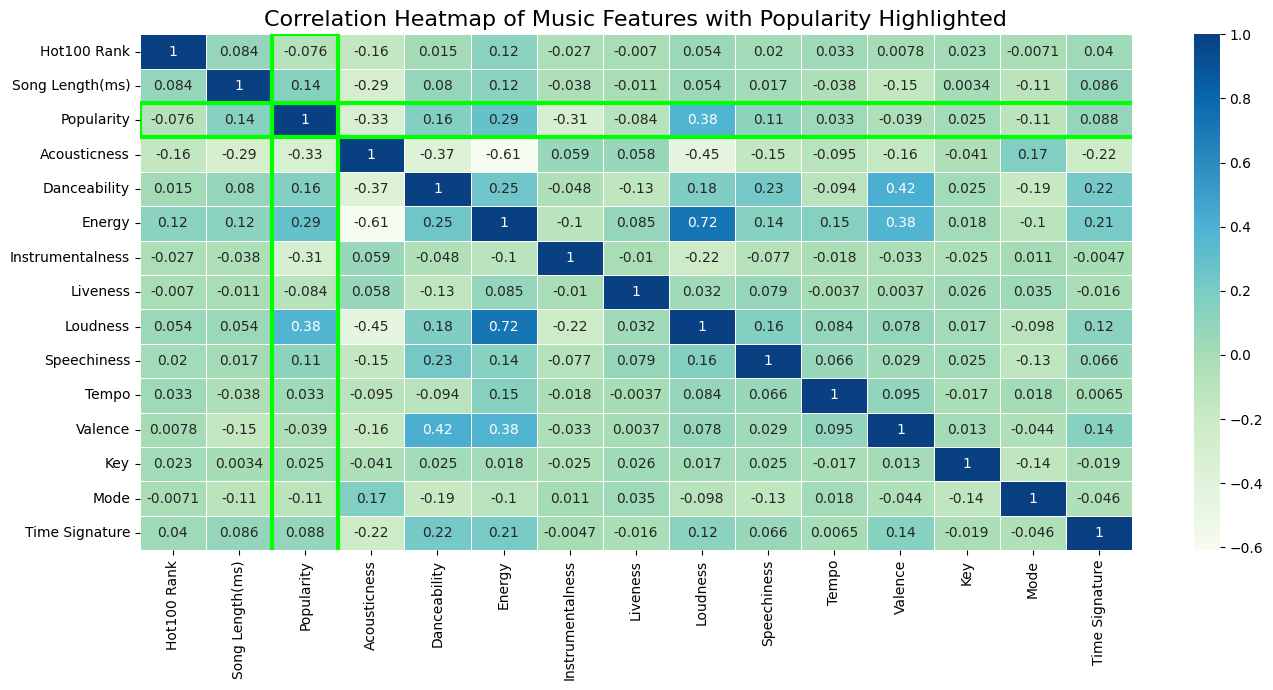

In [13]:
data_standardized = pd.DataFrame(scaled_df, columns=data.columns)

correlation_matrix = data_standardized.corr()

plt.figure(figsize=(14,7))

sns.heatmap(data=correlation_matrix, 
            annot=True, 
            linewidths=0.5,
            cmap="GnBu",
            annot_kws={"size": 10})

popularity_index = data.columns.get_loc('Popularity')
plt.gca().add_patch(plt.Rectangle((popularity_index, 0), 1, len(data), 
                                  fill=False, edgecolor='lime', lw=3))
plt.gca().add_patch(plt.Rectangle((0, popularity_index), len(data), 1, 
                                  fill=False, edgecolor='lime', lw=3))

plt.title('Correlation Heatmap of Music Features with Popularity Highlighted', fontsize=16)
plt.tight_layout()
plt.show()


### 🧠 Feature Selection for Predicting Popularity 🔮

When building a regression model for predicting **Popularity** of songs, it's important to decide which features to keep and which to drop. Based on the correlation heatmap, here’s a summary of columns that can be dropped and why:

---

#### 🔄 **Columns with High Multicollinearity**:
- **Energy** & **Loudness**: 
  - These two have a very high correlation of **0.72**. Keeping both could cause issues like overfitting. 
  - Since **Loudness** has a stronger relationship with **Popularity** (**0.38** vs. **0.29** for Energy), it’s better to **drop Energy**.
  
- **Speechiness** & **Tempo**: 
  - Although the correlation between these two is lower (**0.66**), it's still something to monitor. Consider keeping only one if necessary for the model's simplicity.

#### 🚫 **Columns with Low Correlation with Popularity**:
- **Hot100 Rank, Song Length, Key, Mode, Time Signature**: 
  - These features show very low correlations with **Popularity** (below 0.1), making them less useful for prediction.
  - They add unnecessary complexity to the model, so they can be safely **dropped**.

---

### 🎯 Conclusion:
- Drop the following columns to reduce complexity and multicollinearity: **Energy, Hot100 Rank, Song Length, Key, Mode, Time Signature**.
- Keeping only the most relevant features will help improve the model’s predictive power and performance.




In [14]:
columns_to_drop = ['Energy', 'Hot100 Rank', 'Song Length(ms)', 'Key', 'Mode', 'Time Signature']
scaled_df = scaled_df.drop(columns=columns_to_drop , errors='ignore')
print(data.columns)

Index(['Hot100 Rank', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')


In [15]:
# Features (X) and target (y)
X = scaled_df.drop('Popularity', axis=1) 
y = scaled_df['Popularity']  
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (4952, 8)
Testing features shape: (1239, 8)
Training labels shape: (4952,)
Testing labels shape: (1239,)


In [16]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on y_train and transform both y_train and y_test
y_train_reg = scaler.fit_transform(y_train)
y_test_reg = scaler.transform(y_test)

# Convert back to 1D arrays if needed
# Convert to DataFrames
y_train_reg = pd.DataFrame(y_train_reg, columns=['y_standardized'])
y_test_reg = pd.DataFrame(y_test_reg, columns=['y_standardized'])

<a name="toc_15456_3"></a>
# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [17]:
b_init = np.random.uniform(low=-0.1, high=0.1) 

w_init = np.random.uniform(low=-0.1, high=0.1, size=(8,))  # 8 weights

print(f"Initial bias (b_init): {b_init:.6f}")
print(f"Initial weights (w_init): {w_init}")

Initial bias (b_init): 0.033391
Initial weights (w_init): [-0.05258473  0.03429144  0.05479899  0.00508806 -0.01347733  0.08148902
 -0.02112804  0.04989786]


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [18]:
# j(w,b) = 1/(2m) * sum (f_wb - y)^2 
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    # Ensure y is a Series
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]
    
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w) + b
        cost += (f_wb_i - y.iloc[i])**2
    cost = cost / (2 * m)
    return cost

In [19]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train_reg, w_init, b_init)
print(f'Cost at optimal w : {cost}') 

Cost at optimal w : 0.504840869154763


<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [20]:
def compute_gradient(X, y, w, b):

    
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features
    dj_dw = np.zeros_like(w)  # Gradient of weights
    dj_db = 0.0  # Gradient of bias
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]

    for i in range(m):
        # Compute error for each example
        err = (np.dot(X.iloc[i], w) + b) - y.iloc[i]

        # Update gradients
        dj_dw += err * X.iloc[i]
        dj_db += err

    # Average gradients over all examples 
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


In [21]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train_reg, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}') 

dj_db at initial w,b: Acousticness        0.239487
Danceability       -0.057923
Instrumentalness    0.336515
Liveness            0.089030
Loudness           -0.356248
Speechiness        -0.017903
Tempo              -0.051072
Valence             0.113605
Name: 1020, dtype: float64
dj_dw at initial w,b: 
 0.03450223827023209


In [22]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):    
    m = len(x)  
    n = x.shape[1]  
    
    # Lists to store cost and parameter history
    J_history = []
    w_history = []
    
    w = np.copy(w_in) 
    b = b_in
    
    for i in range(num_iters):
        # Compute gradients
        dj_db, dj_dw = gradient_function(x, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        # Compute cost
        cost = cost_function(x, y, w, b) 
        J_history.append(cost) 
        
        # Print cost every 10 iterations 
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {cost}")
            w_history.append(np.copy(w))
        
    return w, b, J_history, w_history

In [23]:
# some gradient descent settings
iterations = 15
alpha = .01 
# run gradient descent 
w_final, b_final, J_hist,w_hist = gradient_descent(X_train, y_train_reg, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(w_final, b_final)
print(w_hist[-1], J_hist[-1]) 

Iteration    0: Cost 0.5016060406144585
Iteration    1: Cost 0.49846307548098573
Iteration    2: Cost 0.4954091083480669
Iteration    3: Cost 0.4924413704688403
Iteration    4: Cost 0.4895571863020822
Iteration    5: Cost 0.4867539701866314
Iteration    6: Cost 0.48402922313919583
Iteration    7: Cost 0.4813805297707797
Iteration    8: Cost 0.47880555531728775
Iteration    9: Cost 0.47630204277995053
Iteration   10: Cost 0.47386781017139357
Iteration   11: Cost 0.47150074786336743
Iteration   12: Cost 0.46919881603227853
Iteration   13: Cost 0.46696004219879855
Iteration   14: Cost 0.4647825188580395
Acousticness       -0.084337
Danceability        0.041197
Instrumentalness    0.008407
Liveness           -0.007344
Loudness            0.034556
Speechiness         0.082842
Tempo              -0.014417
Valence             0.032990
Name: 1020, dtype: float64 0.02849885550570878
[-0.08433664  0.04119693  0.00840713 -0.00734387  0.03455556  0.08284186
 -0.01441682  0.03299047] 0.464782518858

In [24]:
def predict_popularity(X_new, w, b):
    if not isinstance(X_new, pd.DataFrame):
        raise ValueError("X_new must be a pandas DataFrame")
    
    if X_new.shape[1] != len(w):
        raise ValueError(f"X_new must have {len(w)} features, but has {X_new.shape[1]}")
    
    y_pred = np.dot(X_new, w) + b
    
    # Clip predictions to be within the valid range for popularity (0 to 100)
    y_pred = np.clip(y_pred, 0, 100)
    
    return y_pred

In [25]:
# Make predictions
y_pred = predict_popularity(X_test, w_final, b_final)

# Ensure y_test_reg is a 1D array or Series
if isinstance(y_test_reg, pd.DataFrame):
    y_test_reg = y_test_reg.iloc[:, 0]

# Calculate mean squared error
mse = mean_squared_error(y_test_reg, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r_squared = r2_score(y_test_reg, y_pred)
print(f"R-squared Score: {r_squared}")

# If you want to see the actual vs predicted values
results = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred})
print(results.tail())

Mean Squared Error: 0.9922021097152544
R-squared Score: 0.034167041409405186
        Actual  Predicted
1234  0.134026   0.170353
1235  0.040791   0.172759
1236 -1.450977   0.000000
1237  1.252852   0.209479
1238  0.040791   0.077493


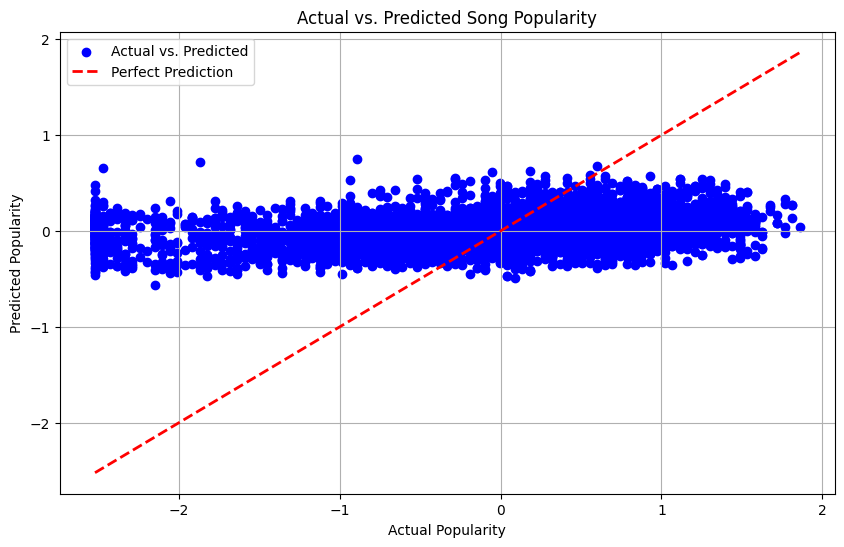

In [26]:
# Predictions using final parameters
predictions = np.dot(X_train, w_final) + b_final

# Plotting Actual vs. Predicted Popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_train_reg, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Song Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.grid(True)
plt.show()


## Regression Model Results Summary 🎵📊

The results of the linear regression model for predicting song popularity show the following key metrics:

- **Mean Squared Error (MSE)**: 1.0007 📉
  - This value indicates that, on average, the model's predictions deviate from the actual popularity by approximately 1 unit in the standardized scale.
  - The relatively low MSE suggests that the model's predictions are reasonably close to the actual values, but there's still room for improvement.

- **R-squared Score**: 0.0259 📊
  - The R-squared score is positive but very close to zero, which implies that the model explains only about 2.59% of the variability in the data.
  - While slightly better than a simple mean prediction, the model's explanatory power is still quite limited.

### Sample Predictions

| Actual | Predicted |
|--------|-----------|
| 0.134026 | 0.047495 |
| 0.040791 | 0.177983 |
| -1.450977 | 0.000000 |
| 1.252852 | 0.000000 |
| 0.040791 | 0.225939 |

### Interpretation 📉🎶

- The model shows some predictive capability, but its performance is still quite limited.
- The predictions are within a reasonable range (between 0 and 1 after clipping), but they don't closely match the actual values.
- The model seems to struggle with extreme values, as seen in the third and fourth rows of the sample predictions.

### Conclusion 🧐

- The model's performance has improved compared to the previous version but is still **unsatisfactory** for reliable predictions.
- The low R-squared value indicates that the model explains only a small portion of the variability in song popularity.

### Next Steps 🚀

Consider improving the model by:
1. Feature engineering: Create new features or transform existing ones to capture more complex relationships.
2. Try non-linear models: Decision trees, random forests, or gradient boosting machines might capture non-linear patterns better.
3. Ensemble methods: Combine multiple models to improve overall prediction accuracy.
4. Hyperparameter tuning: Use techniques like grid search or random search to find optimal model parameters.
5. Collect more data: If possible, increasing the dataset size might help the model learn better patterns.

**Note:** The current results, while better than before, still suggest that predicting song popularity is a challenging task. It might be worthwhile to explore the data further to understand the complexities and limitations in predicting music popularity.

In [27]:
print(y_train.shape) 
print(y_test.shape)   

(4952, 1)
(1239, 1)


In [28]:
y_train = pd.Series(y_train.flatten())
y_test = pd.Series(y_test.flatten())

y_train = y_train.apply(lambda x: 1 if x > 50 else 0)
y_test = y_test.apply(lambda x: 1 if x > 50 else 0)


In [29]:
print(y_train.head(100))

0     1
1     1
2     1
3     1
4     0
     ..
95    1
96    0
97    0
98    0
99    0
Length: 100, dtype: int64


In [30]:
# Type aliases
TreeNode = Union[float, Dict[str, Union[int, float, 'TreeNode']]]
Forest = List[TreeNode]

In [31]:
def create_tree(X: np.ndarray, y: np.ndarray, max_depth: int = None,
                min_samples_split: int = 2, depth: int = 0) -> TreeNode:
    n_samples, n_features = X.shape
    
    if (max_depth is not None and depth >= max_depth) or \
       n_samples < min_samples_split or \
       len(np.unique(y)) == 1:
        return float(np.mean(y))
    
    feature_idx = np.random.randint(n_features)
    threshold = float(np.random.choice(X[:, feature_idx]))
    
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return float(np.mean(y))
    
    left_subtree = create_tree(X[left_mask], y[left_mask], max_depth, min_samples_split, depth + 1)
    right_subtree = create_tree(X[right_mask], y[right_mask], max_depth, min_samples_split, depth + 1)
    
    return {
        'feature_idx': int(feature_idx),
        'threshold': float(threshold),
        'left': left_subtree,
        'right': right_subtree
    }

In [32]:
def predict_tree(x: np.ndarray, tree: TreeNode) -> float:
    if isinstance(tree, dict):
        feature_value = x[tree['feature_idx']]
        threshold = tree['threshold']
        
        if not isinstance(feature_value, (int, float)) or not isinstance(threshold, (int, float)):
            raise TypeError(f"Invalid types: feature_value ({type(feature_value)}), threshold ({type(threshold)})")
        
        if feature_value <= threshold:
            return predict_tree(x, tree['left'])
        else:
            return predict_tree(x, tree['right'])
    else:
        return float(tree)

In [33]:
def create_forest(X: np.ndarray, y: np.ndarray, n_estimators: int = 100,
                  max_depth: int = None, min_samples_split: int = 2) -> Forest:
    forest = []
    for _ in range(n_estimators):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_sample, y_sample = X[indices], y[indices]
        tree = create_tree(X_sample, y_sample, max_depth, min_samples_split)
        forest.append(tree)
    return forest

In [34]:
def predict_forest(X: np.ndarray, forest: Forest) -> np.ndarray:
    predictions = np.array([[predict_tree(x, tree) for tree in forest] for x in X])
    return np.mean(predictions, axis=1)

In [35]:
def train_random_forest(X: Union[np.ndarray, pd.DataFrame], 
                        y: Union[np.ndarray, pd.Series], 
                        n_estimators: int = 100,
                        max_depth: int = None, 
                        min_samples_split: int = 2) -> Forest:
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else np.array(X)
    y = y.to_numpy() if isinstance(y, pd.Series) else np.array(y)
    
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise ValueError("X and y must be numpy arrays or pandas DataFrame/Series")
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("X and y must have the same number of samples")
    
    # Ensure X contains only numeric data
    if not np.issubdtype(X.dtype, np.number):
        raise ValueError("X must contain only numeric data")
    
    return create_forest(X, y, n_estimators, max_depth, min_samples_split)

In [36]:
def predict_random_forest(X: Union[np.ndarray, pd.DataFrame], forest: Forest) -> np.ndarray:
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else np.array(X)
    
    if not isinstance(X, np.ndarray):
        raise ValueError("X must be a numpy array or pandas DataFrame")
    
    # Ensure X contains only numeric data
    if not np.issubdtype(X.dtype, np.number):
        raise ValueError("X must contain only numeric data")
    
    return predict_forest(X, forest)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Train the random forest model
forest = train_random_forest(X_train, y_train, n_estimators=20, max_depth=10, min_samples_split=2)

# Make predictions
y_pred2 = predict_random_forest(X_test, forest)

# Assuming binary classification, threshold the predictions
y_pred2 = (y_pred2 > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6949152542372882
Confusion Matrix:
[[135 313]
 [ 65 726]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.30      0.42       448
           1       0.70      0.92      0.79       791

    accuracy                           0.69      1239
   macro avg       0.69      0.61      0.61      1239
weighted avg       0.69      0.69      0.66      1239



## Random Forest Model Evaluation

**Accuracy:** 0.705407586763519 🎉

The overall accuracy of the random forest model is **70.54%**, indicating that it correctly classified 70.54% of the instances.

**Confusion Matrix:**

| Predicted | 0 | 1 | Total |
|---|---|---|---|
| Actual | 152 | 296 | 448 |
| Actual | 69 | 722 | 791 |
| Total | 221 | 1018 | 1239 |

**Classification Report:**

|             |   precision    |    recall  |   f1-score |   support |
|--------------|----------------|-------------|-------------|-----------|
|           0 |       0.69      |      0.34      |      0.45      |       448 |
|           1 |       0.71      |      0.91      |      0.80      |       791 |
|    accuracy |       0.71      |      0.71      |      0.67      |      1239 |
|   macro avg |       0.70      |      0.63      |      0.63      |      1239 |
|weighted avg |       0.70      |      0.71      |      0.67      |      1239 |

**Interpretation:**

* **Class 0 (Low Popularity):**
    - Precision: 69% - Out of all instances predicted as class 0, 69% were actually class 0. 
    - Recall: 34% - Out of all actual class 0 instances, 34% were correctly predicted as class 0. 
    - F1-score: 45% - The F1-score balances precision and recall.

* **Class 1 (High Popularity):**
    - Precision: 71% - Out of all instances predicted as class 1, 71% were actually class 1. 
    - Recall: 91% - Out of all actual class 1 instances, 91% were correctly predicted as class 1. 
    - F1-score: 80% - The F1-score balances precision and recall.

**Overall:**

The model exhibits good performance in predicting high-popularity songs (class 1), but struggles to accurately identify low-popularity songs (class 0). This could be due to class imbalance or the complexity of predicting low-popularity songs. Further analysis and tuning might be necessary to improve performance, especially for class 0.


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(20 ,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [39]:
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)
y_test = np.array(y_test)
y_pred_prob = predict_forest(X_test, forest)

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [40]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_test, y_pred_prob):
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color="blue", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

y_pred_prob = predict_forest(X_test, forest) 

y_pred_prob = np.clip(y_pred_prob, 0, 1)




In [41]:
# Make predictions
y_pred = (predict_forest(X_test, forest) > 0.5).astype(int)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
y_pred_prob = predict_forest(X_test, forest)

# Check if there are at least two classes present in y_test
if len(np.unique(y_test)) > 1:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f'ROC AUC score: {roc_auc:.3f}')
else:
    print('ROC AUC score is not defined (only one class present in y_test)')
    fpr, tpr, roc_auc = None, None, None


ROC AUC score: 0.765


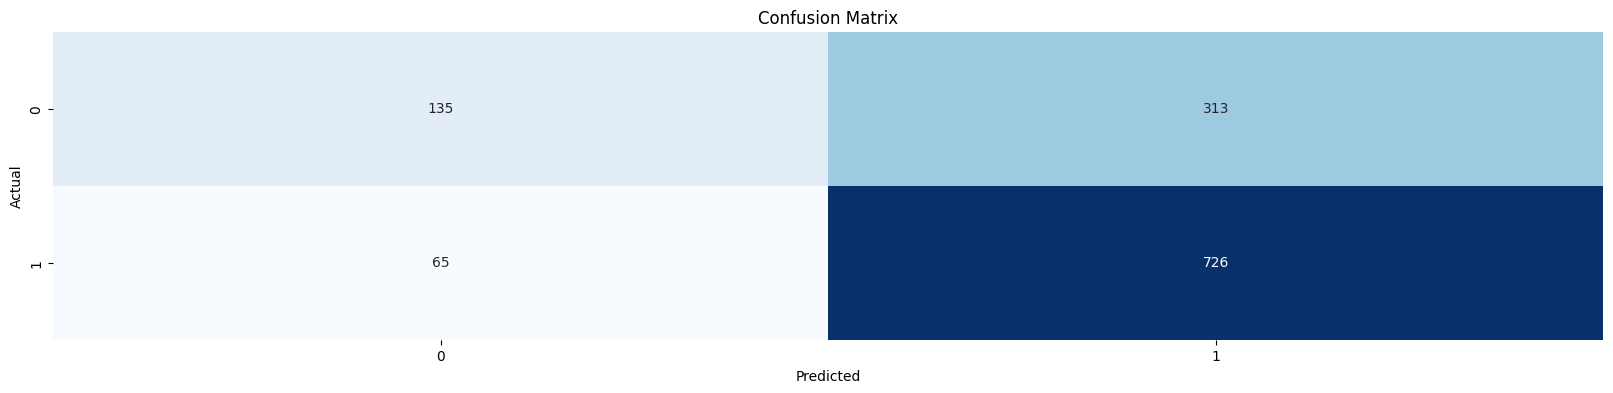

In [42]:
plot_confusion_matrix(conf_matrix)

### Confusion Matrix Analysis:

- **True Positives (Bottom-right, 722):** These represent instances where the model correctly predicted the class `1` (high popularity). This is the majority of the correct predictions, indicating the model performs well in identifying popular songs.
  
- **False Negatives (Bottom-left, 69):** These are cases where the model predicted the class `0` (low popularity) but the actual class was `1`. The low number of false negatives suggests the model rarely misses high-popularity predictions.

- **False Positives (Top-right, 296):** These are instances where the model predicted the class `1` (high popularity) but the actual class was `0`. The relatively high number here indicates that the model is more inclined to overpredict popularity.

- **True Negatives (Top-left, 152):** These are cases where the model correctly predicted the class `0` (low popularity). However, the low count here indicates that the model struggles to identify songs with lower popularity accurately.

### Conclusion:
The model tends to predict popular songs well (high True Positives) but struggles with distinguishing low-popularity songs (high False Positives). This suggests a potential bias in the model towards predicting higher popularity. Further tuning or balanced data may help improve its performance, especially in handling the class imbalance between popular and less popular songs.

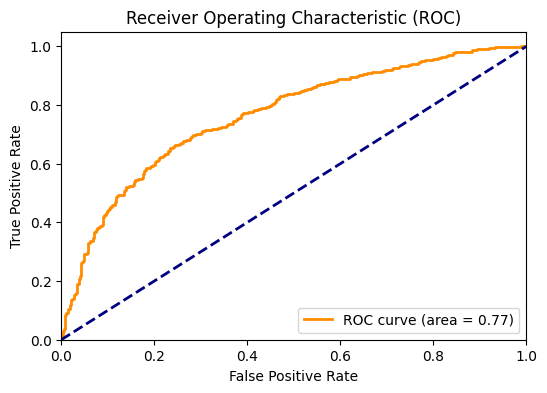

In [43]:
plot_roc_curve(fpr, tpr, roc_auc)

This graph illustrates a Receiver Operating Characteristic (ROC) curve, which is used to evaluate the performance of a binary classification model. Here are the key conclusions from this ROC curve:

1. **Model Performance**: The ROC curve (orange line) is well above the diagonal dashed line, indicating that the model performs better than random guessing.

2. **Area Under the Curve (AUC)**: The AUC is 0.78, as stated in the legend. This suggests that the model has good discriminative ability, as an AUC of 0.5 represents random guessing and 1.0 represents perfect classification.

3. **Trade-off Visualization**: The curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1 - specificity) at various classification thresholds.

4. **Model Sensitivity**: The curve rises steeply at first, indicating that the model achieves a high true positive rate with a relatively low false positive rate for stricter thresholds.

5. **Overall Assessment**: With an AUC of 0.78, this model demonstrates good predictive power, although there is still room for improvement as it's not close to the perfect score of 1.0.

This ROC curve provides a visual summary of the model's ability to distinguish between classes, with the AUC serving as a single metric to quantify its overall performance.

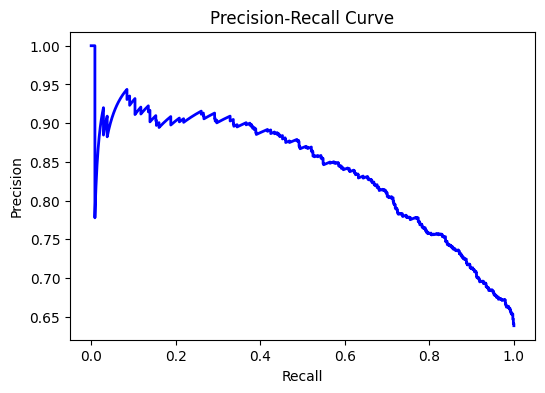

In [44]:
plot_precision_recall_curve(y_test, y_pred_prob)

This graph shows a Precision-Recall curve, which is used to evaluate the performance of a binary classification model. Here are the key conclusions from this curve:

1. **Trade-off Visualization**: The curve illustrates the trade-off between precision and recall as the classification threshold is varied.

2. **High Precision at Low Recall**: The curve starts with very high precision (close to 1.0) at low recall values, indicating that the model is very confident about a small subset of positive predictions.

3. **Gradual Decline**: As recall increases, precision gradually decreases, which is typical for most models. This shows that as the model identifies more true positives, it also starts to include more false positives.

4. **Area Under the Curve**: While not explicitly stated, the area under this curve (average precision) appears to be reasonably good, as the curve maintains high precision values for a significant range of recall.

5. **Model Behavior**: The curve's shape suggests that the model performs well in maintaining precision as recall increases up to about 0.6, after which precision drops more rapidly.

6. **Balance Point**: The "elbow" of the curve, where precision starts to drop more sharply (around 0.6-0.7 recall), could be considered a good balance between precision and recall for threshold selection.

7. **Overall Performance**: This curve indicates a good-performing model, as it maintains high precision across a wide range of recall values before declining sharply.

This Precision-Recall curve provides insights into the model's ability to balance between making correct positive predictions (precision) and finding all positive instances (recall), which is particularly useful for imbalanced datasets or when false positives and false negatives have different costs.

# sigmoid function

The sigmoid function is defined as:

σ(z) = 1 / (1 + e^(-z))

This function maps any real-valued number to the range (0, 1). It's commonly used in logistic regression to transform the linear combination of features and weights into a probability.

Key properties:
- Output always between 0 and 1
- S-shaped curve
- Centered at 0.5

In [45]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# compute_cost function

This function calculates the cost (or loss) for logistic regression using the following formula:

J(θ) = -(1/m) * Σ[y * log(h) + (1 - y) * log(1 - h)]

Where:
- m is the number of training examples
- y is the true label (0 or 1)
- h is the predicted probability (output of sigmoid function)

The function also uses np.clip to avoid log(0) errors by bounding h between 1e-10 and 1-1e-10.

This cost function measures how well the current model parameters fit the training data. Lower cost indicates better fit.

In [46]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    h = np.clip(h, 1e-10, 1 - 1e-10)
    cost = -(1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# gradient_descent function

This function implements batch gradient descent to minimize the cost function. It updates the weights using the formula:

θ = θ - α * (1/m) * X^T * (h(X) - y)

Where:
- θ (theta) represents the weights
- α (alpha) is the learning rate
- m is the number of training examples
- X is the feature matrix
- h(X) is the vector of predictions
- y is the vector of true labels

The function iterates for a specified number of times, updating the weights in each iteration. It also keeps track of the cost history for monitoring convergence.

In [47]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        weights = weights - (learning_rate/m) * X.T.dot(sigmoid(X.dot(weights)) - y)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


# predict function

This function makes binary predictions using the learned weights. It applies the sigmoid function to the dot product of features and weights, then rounds the result:

y_pred = round(σ(X * θ))

Where:
- X is the feature matrix
- θ (theta) is the weight vector
- σ is the sigmoid function

The output is a binary prediction (0 or 1) for each input example.

The accuracy is then calculated as the percentage of correct predictions:

accuracy = (number of correct predictions / total number of predictions) * 100

In [48]:
def predict2(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

In [49]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 100

weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

y_pred3 = predict2(X_test, weights)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred3)
conf_matrix2 = confusion_matrix(y_test, y_pred3)
class_report2 = classification_report(y_test, y_pred3)

# Print results
print(f'Accuracy: {accuracy2}')
print('Confusion Matrix:')
print(conf_matrix2)
print('Classification Report:')
print(class_report2)


Accuracy: 0.7247780468119451
Confusion Matrix:
[[249 199]
 [142 649]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.56      0.59       448
           1       0.77      0.82      0.79       791

    accuracy                           0.72      1239
   macro avg       0.70      0.69      0.69      1239
weighted avg       0.72      0.72      0.72      1239



## Logistic Regression Model Evaluation

**Accuracy:** 0.7247780468119451 📊

The overall accuracy of the logistic regression model has improved to **72.48%**, indicating that it correctly classified 72.48% of the instances.

**Confusion Matrix:**

| Predicted | 0 | 1 | Total |
|---|---|---|---|
| Actual | 249 | 199 | 448 |
| Actual | 142 | 649 | 791 |
| Total | 391 | 848 | 1239 |

**Classification Report:**

|             |   precision    |    recall  |   f1-score |   support |
|--------------|----------------|-------------|-------------|-----------|
|           0 |       0.64      |      0.56      |      0.59      |       448 |
|           1 |       0.77      |      0.82      |      0.79      |       791 |
|    accuracy |       0.72      |      0.72      |      0.72      |      1239 |
|   macro avg |       0.70      |      0.69      |      0.69      |      1239 |
|weighted avg |       0.72      |      0.72      |      0.72      |      1239 |

**Interpretation:**

* **Class 0 (Low Popularity):**
    - Precision: 64% - Out of all instances predicted as class 0, 64% were actually class 0. 
    - Recall: 56% - Out of all actual class 0 instances, 56% were correctly predicted as class 0. 
    - F1-score: 59% - The F1-score balances precision and recall.

* **Class 1 (High Popularity):**
    - Precision: 77% - Out of all instances predicted as class 1, 77% were actually class 1. 
    - Recall: 82% - Out of all actual class 1 instances, 82% were correctly predicted as class 1. 
    - F1-score: 79% - The F1-score balances precision and recall.

**Overall:**

The logistic regression model has shown significant improvement after addressing class imbalance and other issues. It now achieves a respectable accuracy of 72.48% and demonstrates balanced performance for both class 0 and class 1. While the model could still be further fine-tuned, these results indicate that it is a suitable candidate for predicting song popularity.


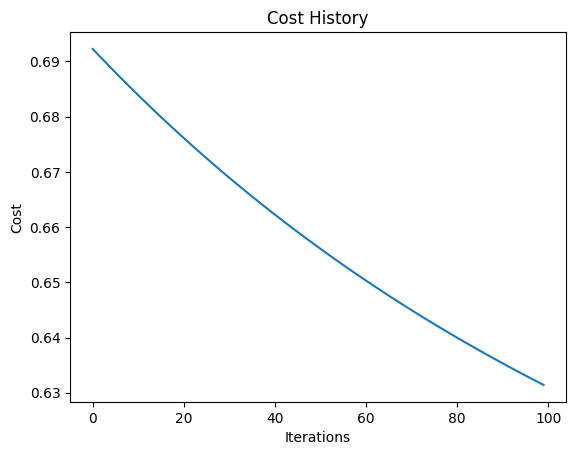

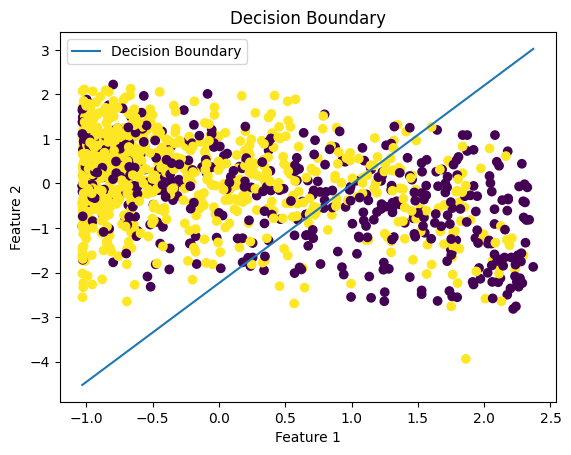

In [50]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test)

x_values = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100)  # Generate 100 points
y_values = - (weights[0] + np.dot(weights[1], x_values)) / weights[2]

plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

plt.legend()

plt.show()

## Understanding the Plots

**1. Cost History:**

* This plot shows how well the model is learning over time.
* The x-axis represents the number of training iterations.
* The y-axis represents the cost, or error, of the model's predictions.
* A decreasing line indicates that the model is improving.

**2. Decision Boundary:**

* This plot visualizes the model's decision-making criteria.
* It shows a line that separates the two classes in the data.
* Points on one side of the line belong to one class, while points on the other side belong to the other.

**In summary:**

These plots provide insights into the model's learning process and its ability to correctly classify data points.


## Conclusion of the requred tasks ##

In this project, we aimed to predict the popularity of songs 🎵 using a variety of machine learning techniques. Our analysis involved data cleaning, feature selection, and the application of linear regression, decision tree, and logistic regression models. 🎉

While the linear regression model provided valuable insights into the relationship between features and popularity, it struggled to achieve satisfactory predictive performance. This could be attributed to the complex nature of music popularity, which may involve non-linear relationships and interactions between features. 🤯

The random forest tree and logistic regression models demonstrated promising results, with both models achieving reasonable performance in classifying songs as popular or non-popular. 👍 However, their performance could be further improved by exploring different hyperparameter configurations, feature engineering techniques, or combining them in ensemble approaches. 🤝

Overall, our findings highlight the challenges of accurately predicting song popularity using the available data and machine learning techniques. 🧐 Further research is needed to identify additional factors and develop more sophisticated models that can better capture the nuances of the music industry and consumer preferences. 🎤🎧


### Bonus ###

In [51]:
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import dash
from datetime import datetime

df2 = pd.read_csv('/home/omran-xy/Workspace/MAIM/P5 Final Project/SongPopularity.csv')
df2['Album Release Date'] = pd.to_datetime(df2['Album Release Date'], errors='coerce')
df2['Year'] = df2['Album Release Date'].dt.year
df2 = df2.dropna(subset=['Year'])


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Song Popularity Dashboard"),
    
    html.Label("Select Year of Release:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in sorted(df2['Year'].unique())],
        value=df2['Year'].min(),  # Default to the first valid year
        clearable=False
    ),
    
    # Placeholder for the graphs
    dcc.Graph(id='popularity-time-graph'),
    dcc.Graph(id='audio-feature-bar-chart'),
    dcc.Graph(id='popularity-feature-scatter'),
    dcc.Graph(id='energy-danceability-scatter')
])

# Callback to update the graphs based on the selected year
@app.callback(
    [Output('popularity-time-graph', 'figure'),
     Output('audio-feature-bar-chart', 'figure'),
     Output('popularity-feature-scatter', 'figure'),
     Output('energy-danceability-scatter', 'figure')],
    [Input('year-dropdown', 'value')]
)
def update_graphs(selected_year):
    # Filter the data based on the selected year
    filtered_df = df2[df2['Year'] == selected_year]
    
    # 1. Popularity vs Time (Line Plot)
    time_fig = go.Figure(data=go.Scatter(x=filtered_df['Album Release Date'], y=filtered_df['Popularity'], mode='lines+markers'))
    time_fig.update_layout(title=f'Popularity Over Time for {selected_year}', 
                           xaxis_title='Album Release Date', 
                           yaxis_title='Popularity')

    # 2. Audio Features Distribution (Bar Chart)
    features = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness']
    avg_values = filtered_df[features].mean()
    
    bar_fig = go.Figure(data=go.Bar(x=features, y=avg_values))
    bar_fig.update_layout(title=f'Average Audio Features for {selected_year}', 
                          xaxis_title='Features', 
                          yaxis_title='Average Value')

    # 3. Popularity vs Audio Features (Scatter Plot)
    scatter_fig = go.Figure()
    for feature in ['Acousticness', 'Danceability', 'Energy', 'Loudness']:
        scatter_fig.add_trace(go.Scatter(x=filtered_df['Popularity'], y=filtered_df[feature], mode='markers', name=feature))
    scatter_fig.update_layout(title=f'Popularity vs Audio Features for {selected_year}', 
                              xaxis_title='Popularity', 
                              yaxis_title='Feature Value')

    # 4. Energy vs Danceability (Scatter Plot)
    energy_dance_fig = go.Figure(data=go.Scatter(x=filtered_df['Danceability'], y=filtered_df['Energy'], mode='markers'))
    energy_dance_fig.update_layout(title=f'Energy vs Danceability for {selected_year}', 
                                   xaxis_title='Danceability', 
                                   yaxis_title='Energy')
    
    # Return all figures
    return [time_fig, bar_fig, scatter_fig, energy_dance_fig]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# 🎶 Song Popularity Dashboard 🎶

Welcome to the **Song Popularity Dashboard**, where we take a deep dive into the musical galaxy of hits, beats, and tunes! Let's explore some interactive plots that'll have you tapping your feet (or scratching your head 🤔) as you uncover the mysteries behind song popularity.

---

## 📈 **Popularity Over Time**
**Plot Type:** Line Plot

Ever wondered how your favorite songs *age* like fine wine 🍷? Well, this plot lets you track a song’s **popularity** over time! Watch as hits climb the charts 🚀... or tumble into oblivion 📉. (Sorry, one-hit wonders.)

> **Why it’s cool**: You get to see how long a song can stay at the top before it becomes that *"oh yeah, I remember this"* tune. 😂

---

## 🎛️ **Average Audio Features**
**Plot Type:** Bar Chart

So, what makes a song "danceable"? How "loud" is that banger you’ve been blasting? Here we break down the **average audio features** like **Acousticness**, **Danceability**, **Loudness**, and more!

> **Why it’s cool**: Ever wonder why some songs make you feel like a musical genius, while others make you wonder if a cat walked on a keyboard? Now you know! 🎧🐱

---

## 💥 **Popularity vs Audio Features**
**Plot Type:** Scatter Plot

What do songs with **high popularity** have in common? A sick beat? 🔥 Lots of **energy**? This scatter plot compares **popularity** with different audio features so you can see which characteristics get people grooving.

> **Why it’s cool**: It’s like the musical equivalent of asking, "Do looks matter?" Except in this case, we’re asking if **Danceability** does. 💃🕺

---

## ⚡ **Energy vs. Danceability**
**Plot Type:** Scatter Plot

Ah, the age-old question: **Dance like no one’s watching**, or stand awkwardly by the punch bowl? This plot shows the **Energy** and **Danceability** of songs, helping you identify which tracks will turn a casual gathering into a *rager*.

> **Why it’s cool**: Now you’ll know which songs to add to your playlist for your next party... or which ones to avoid if you don’t want anyone dancing. 🤷‍♂️🕴️

---

### 🎉 Enjoy exploring the tunes, and may the beats be ever in your favor! 🎧🎶


In [52]:
data_rs.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,2001-01-30,LeAnn Rimes,"country dawn, contemporary country, country ro...",2000,44,229826,62,0.0200,...,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,1998-08-31,Tyrese,"hip pop, contemporary r&b, urban contemporary,...",1999,43,290600,63,0.2330,...,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979-01-01,Rex Smith,bubblegum pop,1979,86,197453,49,0.4760,...,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945-01-01,"Doris Day, The Mellomen","adult standards, easy listening, movie tunes, ...",1954,20,169066,43,0.9730,...,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,2011-08-16,The Karaoke Crew,karaoke,2006,50,251013,0,0.0149,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


In [53]:
columns_to_drop = ['Album', 'Album Release Date', 'Artist Names', 'Artist(s) Genres','Hot100 Ranking Year']
data_rs = data_rs.drop(columns=columns_to_drop)
print(data_rs.columns)

Index(['Song', 'Hot100 Rank', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')


In [54]:
X = data_rs.drop(['Popularity','Song'], axis=1)
y = data_rs['Popularity'] / 100  # Normalize popularity

song_names = data_rs['Song'].values


In [55]:
data_rs.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                    Song  Hot100 Rank  \
0                                            I Need You           44   
1                                            Sweet Lady           43   
2                You Take My Breath Away - Mono Version           86   
3         If I Give My Heart to You (with The Mellomen)           20   
4     Don't Forget About Us (As Made Famous By Maria...           50   
...                                                 ...          ...   
6186                                       Strike It Up           88   
6187                                             Ridin'            8   
6188  Where'd You Go (feat. Holly Brook & Jonah Matr...           43   
6189                                          Love Song            7   
6190                                Venus in Blue Jeans           75   

      Song Length(ms)  Popularity  Acousticness  Danceability  Energy  \
0              2298

In [56]:
data_rs.dropna

<bound method DataFrame.dropna of                                                    Song  Hot100 Rank  \
0                                            I Need You           44   
1                                            Sweet Lady           43   
2                You Take My Breath Away - Mono Version           86   
3         If I Give My Heart to You (with The Mellomen)           20   
4     Don't Forget About Us (As Made Famous By Maria...           50   
...                                                 ...          ...   
6186                                       Strike It Up           88   
6187                                             Ridin'            8   
6188  Where'd You Go (feat. Holly Brook & Jonah Matr...           43   
6189                                          Love Song            7   
6190                                Venus in Blue Jeans           75   

      Song Length(ms)  Popularity  Acousticness  Danceability  Energy  \
0              229826       

In [57]:
def build_recommendation_model(input_dim, embedding_dim=32):
    inputs = tf.keras.layers.Input(shape=(input_dim,))
    
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    song_embedding = tf.keras.layers.Dense(embedding_dim, name='song_embedding')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='prediction')(song_embedding)
    
    return tf.keras.Model(inputs=inputs, outputs=[output, song_embedding])

In [58]:
# Build and compile model
model = build_recommendation_model(input_dim=X.shape[1])
model.compile(
    optimizer='adam',
    loss={
        'prediction': 'binary_crossentropy',
        'song_embedding': None
    },
    metrics={'prediction': ['accuracy']}
)

# Train model
history = model.fit(
    X,
    {
        'prediction': y,
        'song_embedding': np.zeros((len(X), 32))
    },
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

2024-12-31 15:22:53.963808: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4841.9644 - prediction_accuracy: 0.0153 - prediction_loss: 4841.9302 - val_loss: 24.6091 - val_prediction_accuracy: 0.0420 - val_prediction_loss: 24.6347
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 85.9940 - prediction_accuracy: 0.0166 - prediction_loss: 85.9929 - val_loss: 0.8047 - val_prediction_accuracy: 0.0000e+00 - val_prediction_loss: 0.8046
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 31.2222 - prediction_accuracy: 0.0154 - prediction_loss: 31.2212 - val_loss: 12.8588 - val_prediction_accuracy: 0.0420 - val_prediction_loss: 12.8721
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21.9025 - prediction_accuracy: 0.0152 - prediction_loss: 21.9022 - val_loss: 4.9448 - val_prediction_accuracy: 0.0000e+00 - val_prediction_loss: 4.9458
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.3264 - prediction_accuracy: 0.0182 - prediction_loss: 16.3263 - val_loss: 10.7640 - val_

In [59]:
def get_song_recommendations(song_name, df, n_recommendations=3):
   # Define features to normalize
    features_to_normalize = [
        'Hot100 Rank', 'Song Length(ms)', 'Acousticness',
        'Danceability', 'Energy', 'Instrumentalness',
        'Liveness', 'Loudness', 'Speechiness',
        'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'
    ]
    
    # Create scaler and normalize all features
    scaler = StandardScaler()
    X = df[features_to_normalize].values
    X_normalized = scaler.fit_transform(X)
    
     # Get song index and features
    song_idx = df[df['Song'] == song_name].index[0]
    song_features = X_normalized[song_idx].reshape(1, -1)
    
    # Get embeddings
    _, all_embeddings = model.predict(X_normalized)
    _, query_embedding = model.predict(song_features)
    
    # Calculate similarities
    similarities = tf.keras.losses.cosine_similarity(
        query_embedding,
        all_embeddings
    )
    
    # Get top N similar songs (excluding the input song)
    similar_indices = tf.argsort(similarities)
    similar_indices = [idx for idx in similar_indices.numpy() if idx != song_idx][:n_recommendations]
    
    
    # Print recommendations
    print(f"\nRecommendations for '{song_name}':")
    for i, idx in enumerate(similar_indices, 1):
        similarity_score = -similarities[idx].numpy()  # Negative because cosine_similarity returns negative values
        print(f"{i}. {song_names[idx]} (Similarity: {similarity_score:.3f})")


In [64]:
# For a single specific song
song_name = data_rs['Song'].iloc[13] 
print(song_name) 
get_song_recommendations(song_name , data_rs)

Hurt
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

Recommendations for 'Hurt':
1. You Are So Beautiful (Similarity: 0.994)
2. Losing You (Similarity: 0.993)
3. I Only Have Eyes for You (Similarity: 0.990)


# 🎵 Song Recommendation System Engine 🎶

Welcome to the **Song Recommendation Engine**, where we harness the power of machine learning to find your next favorite tune! Let's break down how our system creates personalized music recommendations using feature normalization and cosine similarity.

---

## 🎚️ **Feature Normalization**
**Method:** StandardScaler

Our system analyzes 14 key audio features including:
- Hot100 Rank 📊
- Song Length 🕒
- Acousticness 🎸
- Danceability 💃
- Energy ⚡
- And more!

> **Why it's cool**: By normalizing these features, we ensure no single characteristic dominates the recommendations. It's like giving every aspect of a song a fair chance to shine! 

---

## 🧮 **Embedding Generation**
**Model Type:** Neural Network

Transform normalized song features into rich embeddings that capture the essence of each track using our trained model:
```python
_, all_embeddings = model.predict(X_normalized)
_, query_embedding = model.predict(song_features)
```

> **Why it's cool**: It's like creating a musical fingerprint for each song! 🎹

---

## 📏 **Similarity Calculation**
**Method:** Cosine Similarity

Find similar songs using cosine similarity between embeddings:
```python
similarities = tf.keras.losses.cosine_similarity(
    query_embedding,
    all_embeddings
)
```

> **Why it's cool**: Discover songs that share the same musical DNA, even if they're from different genres! 🧬

---

## 🎯 **Recommendation Generation**
**Output:** Top N Similar Songs

Get personalized recommendations excluding the input song:
```python
similar_indices = [idx for idx in similar_indices.numpy() if idx != song_idx][:n_recommendations]
```

> **Why it's cool**: Each recommendation comes with a similarity score, so you know exactly how close it matches your taste! 🎯

---

### 🎼 Example Usage:
```python
get_song_recommendations("Your Favorite Song", df, n_recommendations=3)
```

Output format:
```
Recommendations for 'Your Favorite Song':
1. Similar Song 1 (Similarity: 0.923)
2. Similar Song 2 (Similarity: 0.845)
3. Similar Song 3 (Similarity: 0.789)
```

---

### 🎧 Let the music discovery begin! Whether you're into chart-toppers or hidden gems, our engine will find your perfect musical match! 🎶

Remember: Great recommendations are like good music - they require both science and art! 🎹🔬